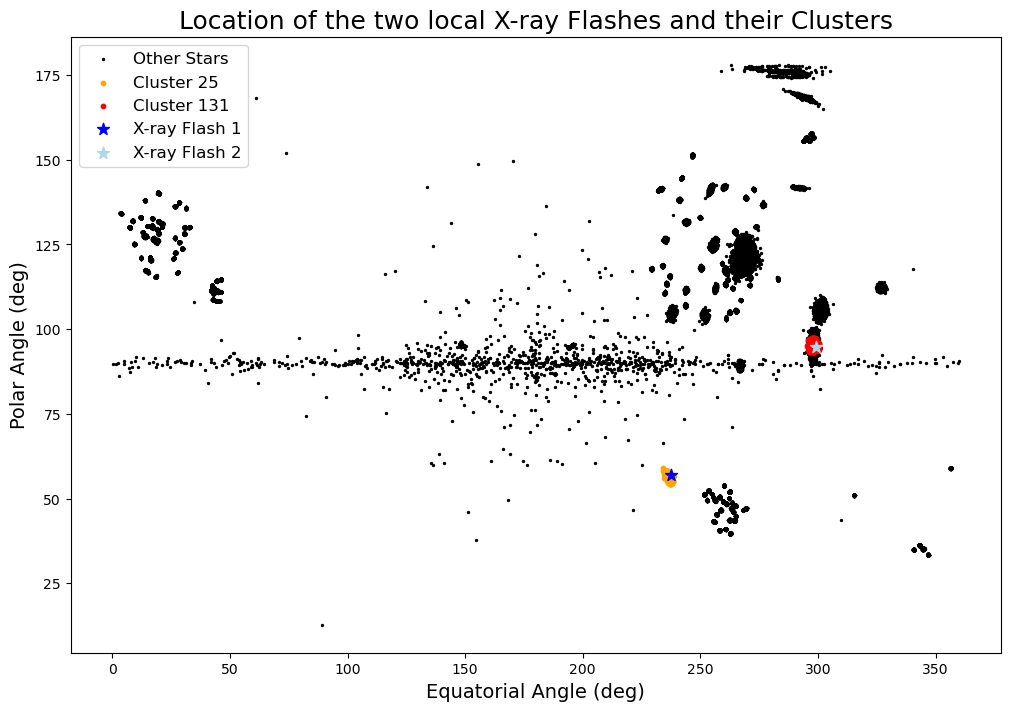

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load star data
star_data = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/star_data_with_luminosity_radii_and_uncertainties.csv')

# Load x-ray flash data
flash_data = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/Converted_Flash_Data.csv')

# Define x-ray flash coordinates
xray_flash_coords = [
    {'Equat': 237.4531, 'Polar': 57.0286, 'Color': 'blue'},
    {'Equat': 299.0741, 'Polar': 94.6328, 'Color': 'lightblue'}
]

# Filter stars by cluster
cluster_25 = star_data[star_data['cluster'] == 25]
cluster_131 = star_data[star_data['cluster'] == 131]
other_stars = star_data[(star_data['cluster'] != 25) & (star_data['cluster'] != 131)]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

# Plot stars
ax.scatter(other_stars['Equat'], other_stars['Polar'], s=2, alpha=1, color='black', label='Other Stars')
ax.scatter(cluster_25['Equat'], cluster_25['Polar'], s=10, alpha=1, color='orange', label='Cluster 25')
ax.scatter(cluster_131['Equat'], cluster_131['Polar'], s=10, alpha=1, color='red', label='Cluster 131')

# Plot x-ray flashes
for i, flash in enumerate(xray_flash_coords):
    ax.scatter(flash['Equat'], flash['Polar'], s=80, alpha=1, color=flash['Color'], marker='*', label=f'X-ray Flash {i+1}')

# Set labels
ax.set_xlabel('Equatorial Angle (deg)', fontsize=14)
ax.set_ylabel('Polar Angle (deg)', fontsize=14)
ax.set_title('Location of the two local X-ray Flashes and their Clusters', fontsize=18)

# Set the legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='best', fontsize=12)

# Set the background color to white
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Show the plot
plt.show()


Top 10 closest variable stars to X-ray flash:
               Name  Distance
37291  RightS175907  0.848393
36642  RightS175813  0.962723
37608  RightS176051  1.061164
36594  RightS175487  1.089019
36528  RightS175808  1.093649
36828  RightS175777  1.120818
37665  RightS175979  1.132502
36364  RightS175338  1.156737
36780  RightS175745  1.339400
36256  RightS175519  1.492383


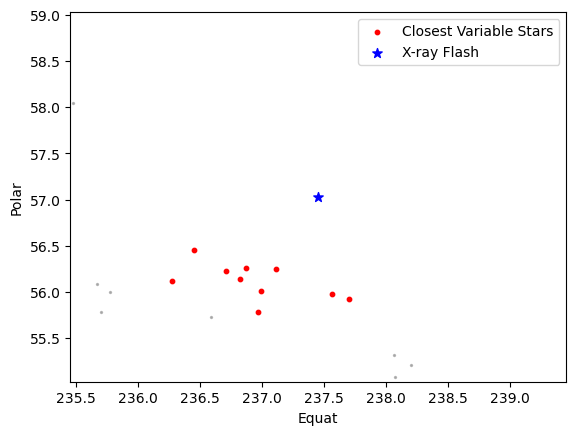

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load star data
star_data = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/Converted_Star_Data.csv')

# Load x-ray flash data
flash_data = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/Converted_Flash_Data.csv')

# Specify coordinates of the x-ray flash
flash_polar = 57.0286
flash_equat = 237.4531

# Define a function to calculate the distance between two points in Polar coordinates
def polar_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Find the distance from the x-ray flash to each star
star_data['Distance'] = polar_distance([star_data['Polar'], star_data['Equat']], [flash_polar, flash_equat])

# Filter for only variable stars
variable_stars = star_data[star_data['Variable?'] == 1]

# Sort by distance and select the closest 10 stars
closest_stars = variable_stars.sort_values('Distance').head(10)

# Print the list of the closest variable stars
print('Top 10 closest variable stars to X-ray flash:')
print(closest_stars[['Name', 'Distance']])

# Plot the locations of the closest variable stars and the x-ray flash
plt.scatter(variable_stars['Equat'], variable_stars['Polar'], s=2, alpha=0.5, color='gray')
plt.scatter(closest_stars['Equat'], closest_stars['Polar'], s=10, alpha=1, color='red', label='Closest Variable Stars')
plt.scatter(flash_equat, flash_polar, s=50, alpha=1, color='blue', marker='*', label='X-ray Flash')
plt.xlabel('Equat')
plt.ylabel('Polar')
plt.legend()

# Zoom in to the area around the x-ray flash
plt.xlim(flash_equat-2, flash_equat+2)
plt.ylim(flash_polar-2, flash_polar+2)

plt.show()
